In [3]:
source('../1.Upscaling/funciones_upscaling.r')


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [2]:
##Creamos el directorio para incluir upscaling de fba
ruta <- "../1.Upscaling"
nombre_directorio <- "upscaling_fba"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("El directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("El directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}
#Creamos el directorio para incluir las áreas por pixel
ruta <- "../1.Upscaling"
nombre_directorio <- "superficiePorPixel"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("\nEl directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("\nEl directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}

#Creamos el directorio para incluir la superficie de area quemable
ruta <- "../1.Upscaling"
nombre_directorio <- "superficieAreaQuemable"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("\nEl directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("\nEl directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}

El directorio upscaling_fba ya existe, por lo que no ha sido creado.
El directorio superficiePorPixel ya existe, por lo que no ha sido creado.
El directorio superficieAreaQuemable ya existe, por lo que no ha sido creado.

In [4]:
load('../0.Data/MODIS_OLCI_fba_200101-202205.Rdata', verbose = TRUE)
load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_05.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_1.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_2.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_3.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_4.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata', verbose=TRUE)

Loading objects:
  fba.merge
Loading objects:
  ba.merge
Loading objects:
  ba.mergeGrid0.5
Loading objects:
  ba.mergeGrid1
Loading objects:
  ba.mergeGrid2
Loading objects:
  ba.mergeGrid3
Loading objects:
  ba.mergeGrid4
Loading objects:
  ba.mergeGrid5


In [5]:
areasPixeles_025 <- func.superficiePorPixel_coordCartes(ba.merge,0.25)
areasPixeles_05 <- func.superficiePorPixel_coordCartes(ba.mergeGrid0.5,0.5)
areasPixeles_1 <- func.superficiePorPixel_coordCartes(ba.mergeGrid1,1)
areasPixeles_2 <- func.superficiePorPixel_coordCartes(ba.mergeGrid2,2)
areasPixeles_3 <- func.superficiePorPixel_coordCartes(ba.mergeGrid3,3)
areasPixeles_4 <- func.superficiePorPixel_coordCartes(ba.mergeGrid4,4)
areasPixeles_5 <- func.superficiePorPixel_coordCartes(ba.mergeGrid5,5)

#Para evitar problemas de espacio eliminadmos vairables:
rm(ba.merge, ba.mergeGrid0.5, ba.mergeGrid1, ba.mergeGrid2, ba.mergeGrid3, ba.mergeGrid4, ba.mergeGrid5)

In [10]:
save(areasPixeles_05, file ='superficiePorPixel/areasPixeles_05.Rdata')
save(areasPixeles_1, file ='superficiePorPixel/areasPixeles_1.Rdata')
save(areasPixeles_2, file ='superficiePorPixel/areasPixeles_2.Rdata')
save(areasPixeles_3, file ='superficiePorPixel/areasPixeles_3.Rdata')
save(areasPixeles_4, file ='superficiePorPixel/areasPixeles_4.Rdata')
save(areasPixeles_5, file ='superficiePorPixel/areasPixeles_5.Rdata')

In [11]:
superficieAreaQuemable_025 <- func.calcularSuperficieAreaQuemable(grid = fba.merge, areasPixeles = areasPixeles_025)

In [12]:
superficieAreaQuemable_05 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 2, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_1 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 4, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_2 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 8, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_3 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 12, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_4 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 16, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_5 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 20, aggr.fun = list(FUN = sum, na.rm = TRUE))

In [13]:
save(superficieAreaQuemable_05, file ='superficieAreaQuemable/superficieAreaQuemable_05.Rdata')
save(superficieAreaQuemable_1, file ='superficieAreaQuemable/superficieAreaQuemable_1.Rdata')
save(superficieAreaQuemable_2, file ='superficieAreaQuemable/superficieAreaQuemable_2.Rdata')
save(superficieAreaQuemable_3, file ='superficieAreaQuemable/superficieAreaQuemable_3.Rdata')
save(superficieAreaQuemable_4, file ='superficieAreaQuemable/superficieAreaQuemable_4.Rdata')
save(superficieAreaQuemable_5, file ='superficieAreaQuemable/superficieAreaQuemable_5.Rdata')

In [14]:
fba_05 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_05, areasPixeles = areasPixeles_05, FinalVarName = "fba_grid_05.Rdata")
fba_1 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_1, areasPixeles = areasPixeles_1, FinalVarName = "fba_grid_1.Rdata")
fba_2 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_2, areasPixeles = areasPixeles_2, FinalVarName = "fba_grid_2.Rdata")
fba_3 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_3, areasPixeles = areasPixeles_3, FinalVarName = "fba_grid_3.Rdata")
fba_4 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_4, areasPixeles = areasPixeles_4, FinalVarName = "fba_grid_4.Rdata")
fba_5 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_5, areasPixeles = areasPixeles_5, FinalVarName = "fba_grid_5.Rdata")

In [15]:
save(fba_05, file ="upscaling_fba/ fba_grid_05.Rdata")
save(fba_1, file ="upscaling_fba/ fba_grid_1.Rdata")
save(fba_2, file ="upscaling_fba/ fba_grid_2.Rdata")
save(fba_3, file ="upscaling_fba/ fba_grid_3.Rdata")
save(fba_4, file ="upscaling_fba/ fba_grid_4.Rdata")
save(fba_5, file ="upscaling_fba/ fba_grid_5.Rdata")

In [16]:
fba_025_clim <- climatology(fba.merge)
fba_05_clim <- climatology(fba_05)
fba_1_clim <- climatology(fba_1)
fba_2_clim <- climatology(fba_2)
fba_3_clim <- climatology(fba_3)
fba_4_clim <- climatology(fba_4)
fba_5_clim <- climatology(fba_5)

[2023-07-18 17:33:43] - Computing climatology...

[2023-07-18 17:34:21] - Done.

[2023-07-18 17:34:23] - Computing climatology...

[2023-07-18 17:34:34] - Done.

[2023-07-18 17:34:35] - Computing climatology...

[2023-07-18 17:34:37] - Done.

[2023-07-18 17:34:37] - Computing climatology...

[2023-07-18 17:34:37] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.



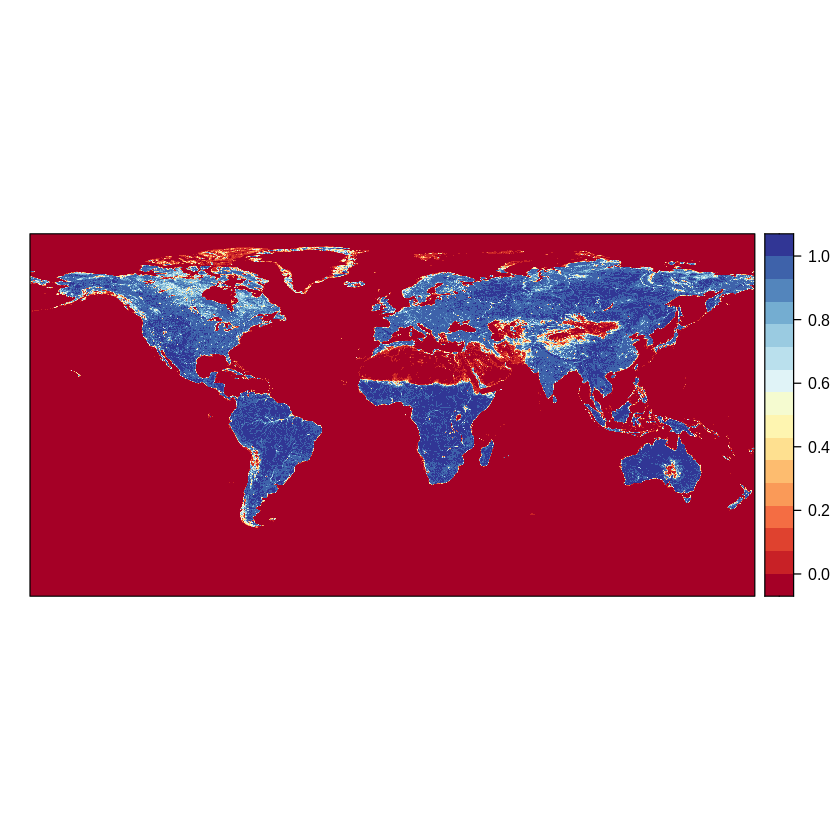

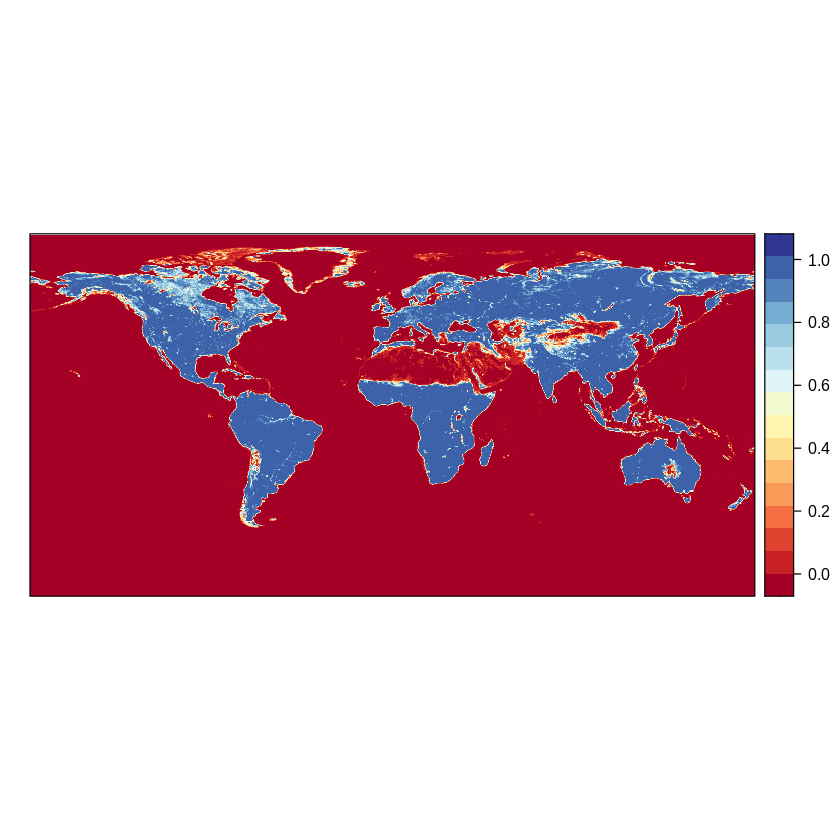

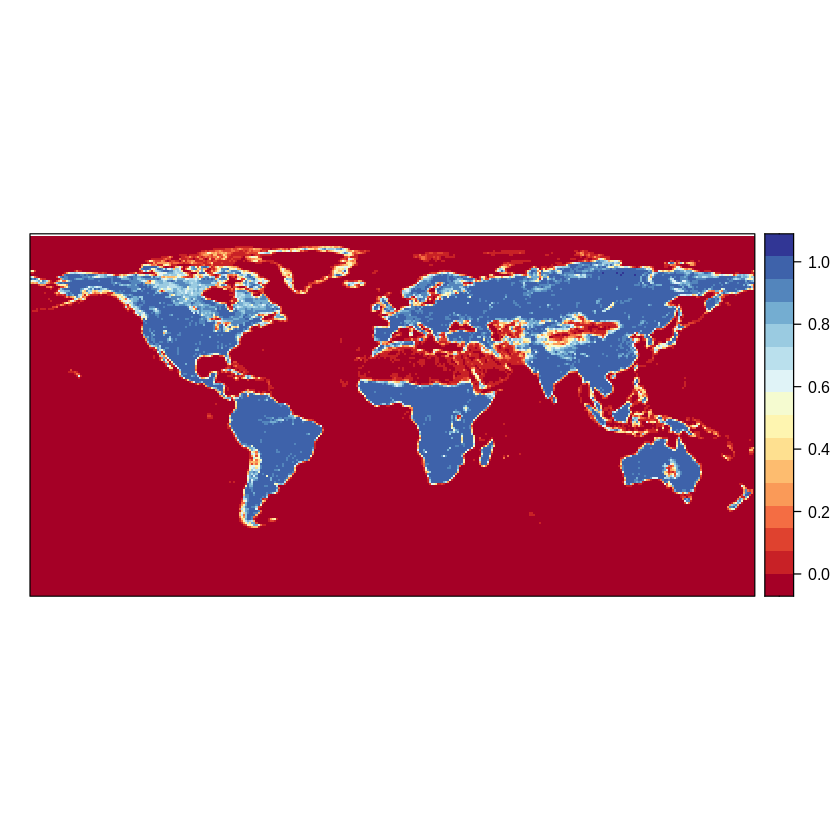

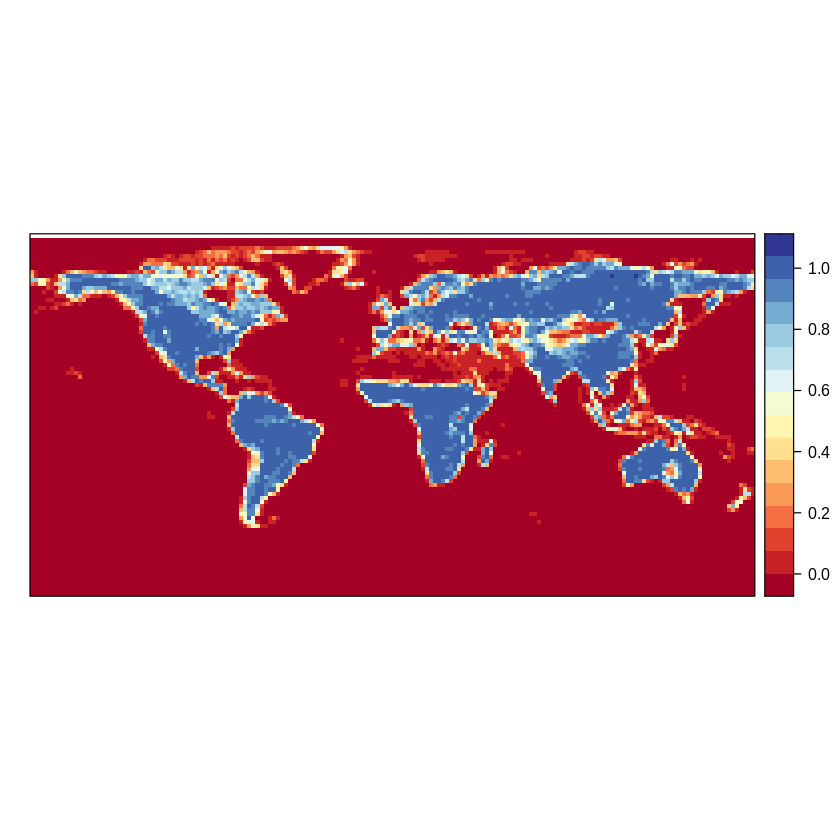

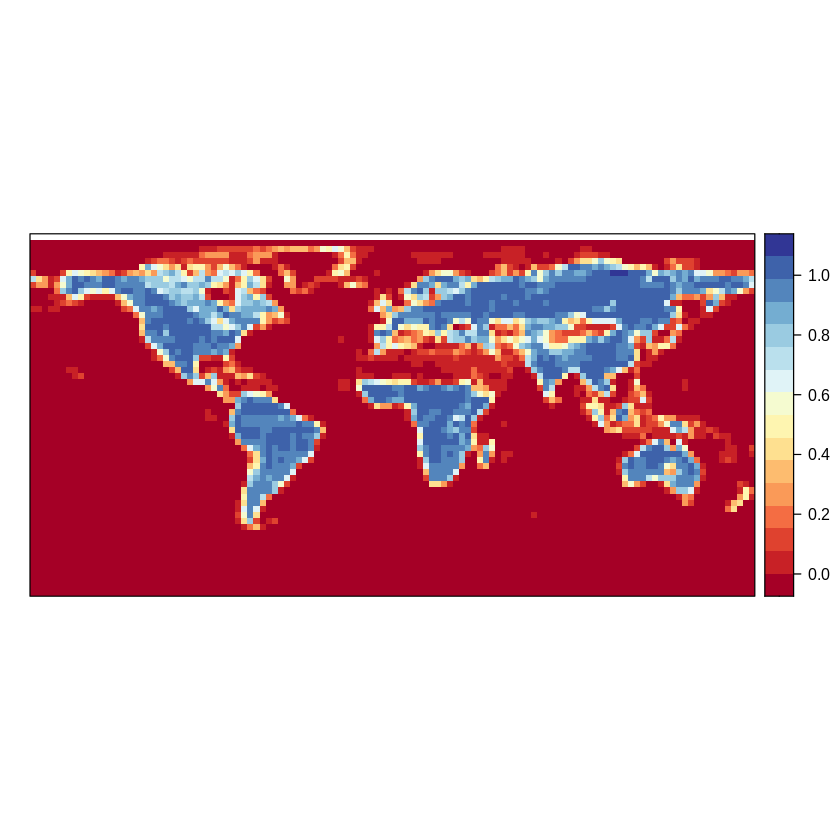

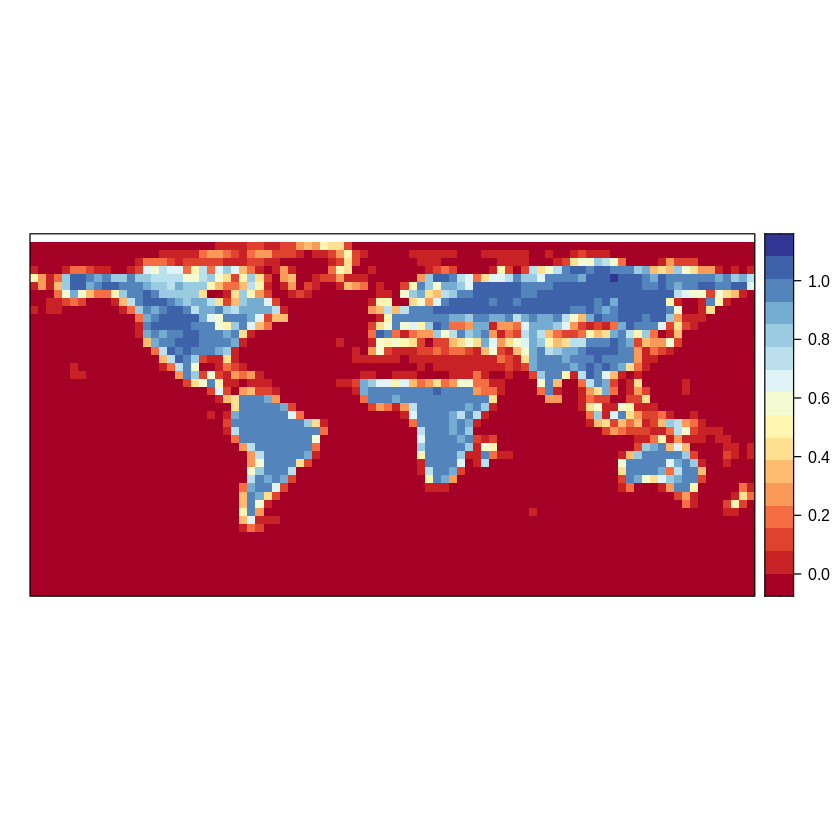

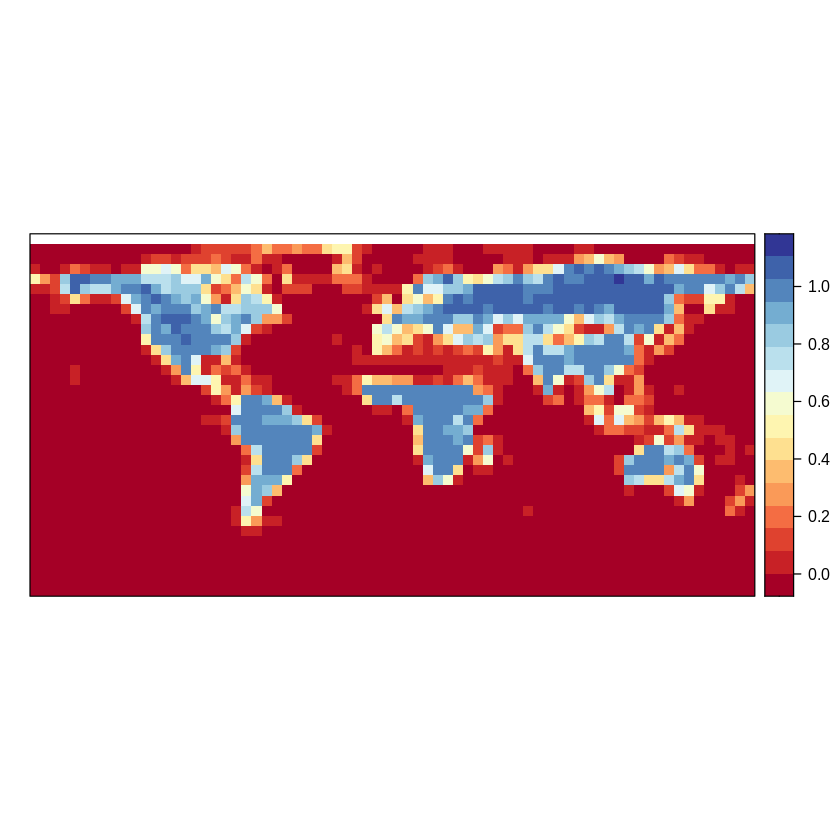

In [17]:
spatialPlot(fba_025_clim)
spatialPlot(fba_05_clim)
spatialPlot(fba_1_clim)
spatialPlot(fba_2_clim)
spatialPlot(fba_3_clim)
spatialPlot(fba_4_clim)
spatialPlot(fba_5_clim)

In [11]:
fba_05 <- func.normalizacion(fba_05)
fba_1 <- func.normalizacion(fba_1)
fba_2 <- func.normalizacion(fba_2)
fba_3 <- func.normalizacion(fba_3)
fba_4 <- func.normalizacion(fba_4)
fba_5 <- func.normalizacion(fba_5)